In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sn

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/SPECTF Heart Dataset/SPECTF.csv')
print('import done')

import done


In [ ]:
dataset.head()

,Class,F1R,F1S,F2S,F2R,F3S,F3R,F4S,F4R,F5S,...,F18S,F18R,F19S,F19R,F20S,F20R,F21S,F21R,F22S,F22R
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
2,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
3,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
4,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60


In [ ]:
dataset.shape

(269, 45)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   269 non-null    int64
 1   F1R     269 non-null    int64
 2   F1S     269 non-null    int64
 3   F2S     269 non-null    int64
 4   F2R     269 non-null    int64
 5   F3S     269 non-null    int64
 6   F3R     269 non-null    int64
 7   F4S     269 non-null    int64
 8   F4R     269 non-null    int64
 9   F5S     269 non-null    int64
 10  F5R     269 non-null    int64
 11  F6S     269 non-null    int64
 12  F6R     269 non-null    int64
 13  F7R     269 non-null    int64
 14  F7S     269 non-null    int64
 15  F8S     269 non-null    int64
 16  F8R     269 non-null    int64
 17  F9S     269 non-null    int64
 18  F9R     269 non-null    int64
 19  F10S    269 non-null    int64
 20  F10R    269 non-null    int64
 21  F11S    269 non-null    int64
 22  F11R    269 non-null    int64
 23  F12S    269 non

## Splitting dataset by dependencies

In [ ]:
X = dataset.drop(['Class'],axis=1)
Y = dataset['Class']

## Finding missing value

In [ ]:
dataset_missing = X.isna()
dataset_missing.head()

,F1R,F1S,F2S,F2R,F3S,F3R,F4S,F4R,F5S,F5R,...,F18S,F18R,F19S,F19R,F20S,F20R,F21S,F21R,F22S,F22R
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset_missing.dtypes

F1R     bool
F1S     bool
F2S     bool
F2R     bool
F3S     bool
F3R     bool
F4S     bool
F4R     bool
F5S     bool
F5R     bool
F6S     bool
F6R     bool
F7R     bool
F7S     bool
F8S     bool
F8R     bool
F9S     bool
F9R     bool
F10S    bool
F10R    bool
F11S    bool
F11R    bool
F12S    bool
F12R    bool
F13S    bool
F13R    bool
F14S    bool
F14R    bool
F15S    bool
F15R    bool
F16S    bool
F16R    bool
F17R    bool
F17S    bool
F18S    bool
F18R    bool
F19S    bool
F19R    bool
F20S    bool
F20R    bool
F21S    bool
F21R    bool
F22S    bool
F22R    bool
dtype: object

In [ ]:
dataset_num_missing = dataset_missing.sum()
dataset_num_missing

F1R     0
F1S     0
F2S     0
F2R     0
F3S     0
F3R     0
F4S     0
F4R     0
F5S     0
F5R     0
F6S     0
F6R     0
F7R     0
F7S     0
F8S     0
F8R     0
F9S     0
F9R     0
F10S    0
F10R    0
F11S    0
F11R    0
F12S    0
F12R    0
F13S    0
F13R    0
F14S    0
F14R    0
F15S    0
F15R    0
F16S    0
F16R    0
F17R    0
F17S    0
F18S    0
F18R    0
F19S    0
F19R    0
F20S    0
F20R    0
F21S    0
F21R    0
F22S    0
F22R    0
dtype: int64

In [ ]:
dataset_num_missing / len(dataset)

F1R     0.0
F1S     0.0
F2S     0.0
F2R     0.0
F3S     0.0
F3R     0.0
F4S     0.0
F4R     0.0
F5S     0.0
F5R     0.0
F6S     0.0
F6R     0.0
F7R     0.0
F7S     0.0
F8S     0.0
F8R     0.0
F9S     0.0
F9R     0.0
F10S    0.0
F10R    0.0
F11S    0.0
F11R    0.0
F12S    0.0
F12R    0.0
F13S    0.0
F13R    0.0
F14S    0.0
F14R    0.0
F15S    0.0
F15R    0.0
F16S    0.0
F16R    0.0
F17R    0.0
F17S    0.0
F18S    0.0
F18R    0.0
F19S    0.0
F19R    0.0
F20S    0.0
F20R    0.0
F21S    0.0
F21R    0.0
F22S    0.0
F22R    0.0
dtype: float64

## Feature transformation or Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[-0.8658201 , -1.36021014,  0.19761902, ...,  0.88565178,
         0.88609696,  1.12367392],
       [ 0.10613861,  0.335227  ,  0.65457761, ...,  0.88565178,
         0.494958  ,  1.19244941],
       [ 1.07809733,  0.97101593,  0.34993855, ..., -0.16734415,
         0.33850241,  0.09204155],
       ...,
       [ 0.10613861, -0.08863229,  0.65457761, ...,  1.28052525,
         1.12078033,  1.19244941],
       [ 0.22763345,  0.01733254,  0.50225808, ..., -0.29896864,
         0.41673021, -0.45816238],
       [-0.01535623, -1.1482805 ,  0.04529949, ...,  0.49077831,
         0.494958  ,  0.57346999]])

## Handling Imbalanced Dataset

Text(0, 0.5, 'No of patients')

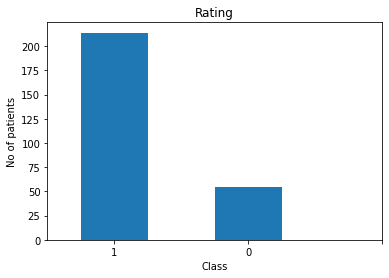

In [ ]:
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Rating")
plt.xticks(range(3))
plt.xlabel("Class")
plt.ylabel("No of patients")

In [ ]:
Normal = Y[Y== 1]
Abnormal = Y[Y== 0]

In [ ]:
print(Normal.shape, Abnormal.shape)

(214,) (55,)


## SMOTE Sampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 10)

In [ ]:
X,Y = smk.fit_resample(X,Y)

In [ ]:
X.shape,Y.shape

((426, 44), (426,))

## Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(ratio = 1)

In [ ]:
XS,Ys = os.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
XS.shape, Ys.shape

((204, 49), (204,))

## Feature Correlation and Dimension Reduction(LDA)

In [ ]:
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(X)
X = pd.DataFrame(X)

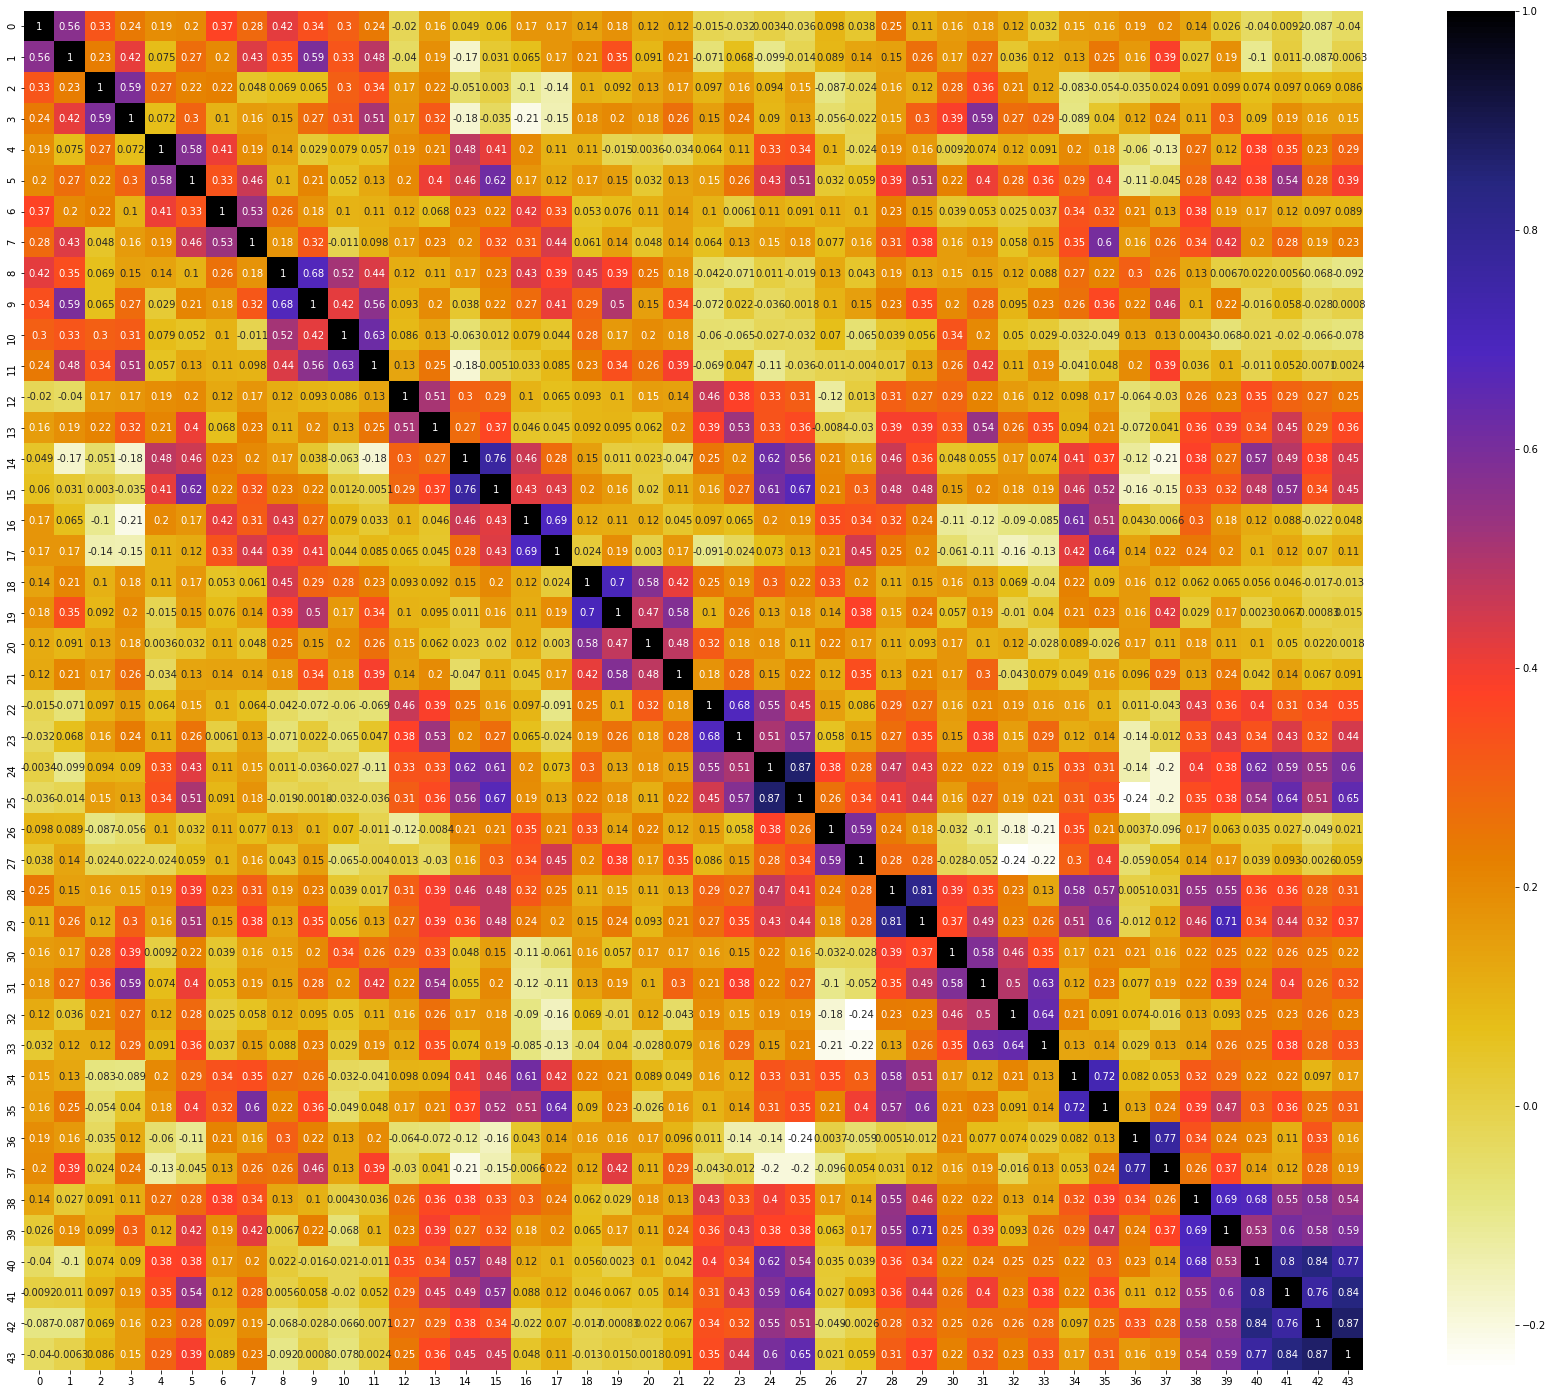

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,25))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 45)
X = lda.fit_transform(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(44, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


## Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Import libraries and Function

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import seaborn as sns

In [ ]:
def cvresult(y,pred):
  print('Cross Val f1 score : ',f1_score(y,pred))
  print('Cross Val Precision : ',precision_score(y,pred))
  print('Cross Val recall : ',recall_score(y,pred))
  print('Cross Val Classification Report : \n',classification_report(y,pred))

In [ ]:
def result(y,p):
  print('Accuracy : ',accuracy_score(y,p))
  print('f1 score : ',f1_score(y,p))
  print('Precision : ',precision_score(y,p))
  print('recall : ',recall_score(y,p))
  print('Classification Report : \n',classification_report(y,p))

## K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass

## Import Classifier Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

# Hyper Parameter Tuning

###  Random search Grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Logistic Regression Random Search

In [ ]:
rs = RandomizedSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),{ 'C' : [1,3,5,10],'max_iter' : [10,100,50]},
                        cv = 10,return_train_score=False, n_iter=2)
rs.fit(X,Y)
best_paramlr = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_C','param_max_iter','mean_test_score']]
print(best_paramlr)

{'max_iter': 10, 'C': 5}


### KNN Random Search

In [ ]:
krs = RandomizedSearchCV(KNeighborsClassifier(),{
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
    },
                        cv = 10,return_train_score=False, n_iter=2)
krs = krs.fit(X_train,Y_train)
best_paramknn = krs.best_params_
pd.DataFrame(krs.cv_results_)[['param_leaf_size','param_n_neighbors','param_p','mean_test_score']]

,param_leaf_size,param_n_neighbors,param_p,mean_test_score
0,5,10,2,0.696169
1,15,10,2,0.696169


### SVM Random Search

In [ ]:
srs = RandomizedSearchCV(SVC(gamma='auto'),
            {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        })
srs.fit(X,Y)
best_params = srs.best_params_
pd.DataFrame(srs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.868646
1,1,linear,0.821560
2,5,rbf,0.913160
3,5,linear,0.852093
4,10,rbf,0.924870
5,10,linear,0.852066
6,20,rbf,0.931929
7,20,linear,0.854419
8,50,rbf,0.927250
9,50,linear,0.854446


### Naive Bayes Random Search

In [ ]:
nbrs = RandomizedSearchCV(GaussianNB(),{'var_smoothing' : [0.01,0.012,0.005,0.001,0.015,0.2,0.1]})
nbrs.fit(X,Y)
best_paramnb = nbrs.best_params_
pd.DataFrame(nbrs.cv_results_)[['param_var_smoothing','mean_test_score']]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


,param_var_smoothing,mean_test_score
0,0.01,0.823995
1,0.012,0.823995
2,0.005,0.821669
3,0.001,0.821669
4,0.015,0.819316
5,0.2,0.744104
6,0.1,0.765308


### Decision Tree Random Search

In [ ]:
dtrs = RandomizedSearchCV(DecisionTreeClassifier(),{
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        })
dtrs.fit(X,Y)
best_paramdt = dtrs.best_params_
pd.DataFrame(dtrs.cv_results_)[['param_splitter','param_min_samples_leaf','param_max_features','param_max_leaf_nodes','mean_test_score']]

,param_splitter,param_min_samples_leaf,param_max_features,param_max_leaf_nodes,mean_test_score
0,random,1,sqrt,None,0.746375
1,best,1,None,50,0.781778
2,best,5,auto,30,0.774720
3,best,5,None,20,0.767688
4,best,2,log2,80,0.713762
5,random,4,sqrt,60,0.722818
6,best,4,sqrt,None,0.704241
7,best,2,auto,30,0.706785
8,random,5,log2,50,0.650260
9,best,4,sqrt,30,0.676005


### Random Forest Random Search

In [ ]:
rfrs = RandomizedSearchCV(RandomForestClassifier(),{
            'bootstrap': [True],
            'max_depth': [5, 10, None],
            'max_features': ['auto', 'log2'],
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
        })
rfrs.fit(X,Y)
best_paramrf = rfrs.best_params_
pd.DataFrame(rfrs.cv_results_)[['param_bootstrap','param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,True,5,auto,13,0.875705
1,True,5,log2,9,0.859343
2,True,5,auto,8,0.889740
3,True,10,auto,6,0.892230
4,True,None,auto,7,0.882791
5,True,10,log2,10,0.901532
6,True,10,auto,5,0.885089
7,True,None,auto,6,0.866265
8,True,5,auto,5,0.856936
9,True,5,log2,12,0.873324


### Extra Tree Random Search

In [ ]:
etrs = RandomizedSearchCV(ExtraTreeClassifier(),{
            'criterion': ['gini','entropy'],
            'max_depth': [i for i in range(1,40,1)],
            'max_features': ['auto', 'log2','sqrt']
        })
etrs.fit(X,Y)
best_paramet = etrs.best_params_
pd.DataFrame(etrs.cv_results_)[['param_criterion','param_max_depth','param_max_features',
                              'mean_test_score']]

,param_criterion,param_max_depth,param_max_features,mean_test_score
0,entropy,27,sqrt,0.875568
1,entropy,24,log2,0.814720
2,entropy,9,log2,0.798140
3,entropy,18,log2,0.852066
4,entropy,23,sqrt,0.833434
5,entropy,32,log2,0.854419
6,entropy,19,log2,0.833434
7,gini,13,auto,0.842818
8,gini,32,auto,0.847469
9,gini,34,log2,0.833297


# Find best parameters

In [ ]:
model_params = {
    'logistic_regression' :{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C' : [1,5,10,20,50]
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        }
    },
    'SVM' :{
        'model': SVC(gamma='auto'),
        'params': {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        }
    },
    'Naive Bayes' :{
        'model': GaussianNB(),
        'params': {
            'var_smoothing' : [0.01,0.02,0.026,0.0265,0.0258,0.03]
        }
    },
    'Decision Tree' :{
        'model': DecisionTreeClassifier(),
        'params': {
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        }
    }
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
  clf= GridSearchCV(mp['model'],mp['params'],cv=10, return_train_score=False)
  clf.fit(X_train,Y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_

  })

In [ ]:
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.840423,{'C': 5}
1,KNN,0.833972,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}"
2,SVM,0.931149,"{'C': 20, 'kernel': 'rbf'}"
3,Naive Bayes,0.818448,{'var_smoothing': 0.01}
4,Decision Tree,0.849698,"{'max_depth': 5, 'max_features': 'log2', 'max_..."


# Tradtional Algorithm

##Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=42,C=best_paramlr['C'])
classifier.fit(X, Y)

LogisticRegression(C=5, random_state=42)

In [ ]:
r_prob = [0 for _ in range(len(Y_test))]

In [ ]:
ytest_pred = classifier.predict_proba(X_test)
lr_prob = classifier.predict_proba(X_test)

In [ ]:
Y_predlr = classifier.predict(X_test)

In [ ]:
Y_cvpredlr = cross_val_predict(classifier, X, Y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predlr)
print(cm)

[[46  0]
 [ 7 54]]


In [ ]:
cm = confusion_matrix(Y,Y_cvpredlr)
print(cm)

[[187  26]
 [ 39 174]]


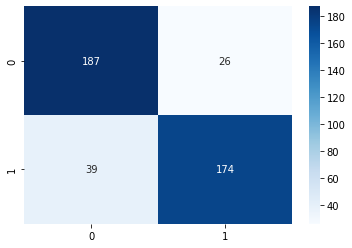

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(classifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.81395349 0.79069767 0.79069767 0.93023256 0.93023256 0.72093023
 0.9047619  0.92857143 0.80952381 0.85714286]

Cross Val Accuracy : 0.8476744186046512


In [ ]:
cvresult(Y,Y_cvpredlr)

Cross Val f1 score :  0.8426150121065376
Cross Val Precision :  0.87
Cross Val recall :  0.8169014084507042
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       213
           1       0.87      0.82      0.84       213

    accuracy                           0.85       426
   macro avg       0.85      0.85      0.85       426
weighted avg       0.85      0.85      0.85       426



In [ ]:
result(Y_test,Y_predlr)

Accuracy :  0.9345794392523364
f1 score :  0.9391304347826086
Precision :  1.0
recall :  0.8852459016393442
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        46
           1       1.00      0.89      0.94        61

    accuracy                           0.93       107
   macro avg       0.93      0.94      0.93       107
weighted avg       0.94      0.93      0.93       107



In [ ]:
lr_auc = roc_auc_score(Y_test,lr_prob[:,1])
print('roc-auc score :{}'.format(lr_auc))

roc-auc score :0.988952245188881


##K-NN

In [ ]:
import math
math.sqrt(len(Y_test))

10.344080432788601

In [ ]:
kclassifier = KNeighborsClassifier(n_neighbors = best_paramknn['n_neighbors'],
                                   p=best_paramknn['p'],leaf_size=best_paramknn['leaf_size'])
kclassifier.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=5)

In [ ]:
Y_predk = kclassifier.predict(X_test)

In [ ]:
ytest_pred = kclassifier.predict_proba(X_test)
knn_prob = kclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredk = cross_val_predict(kclassifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predk)
print(cm)

[[46  0]
 [28 33]]


In [ ]:
cmk = confusion_matrix(Y,Y_cvpredk)
print(cmk)

[[212   1]
 [ 96 117]]


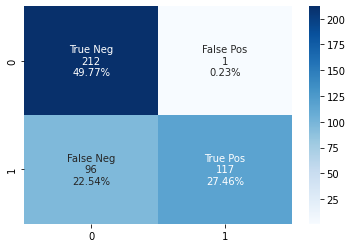

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmk.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmk.flatten()/np.sum(cmk)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmk, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.79069767 0.81395349 0.72093023 0.86046512 0.76744186 0.62790698
 0.85714286 0.76190476 0.76190476 0.76190476]

Cross Val Accuracy : 0.7724252491694352


In [ ]:
cvresult(Y,Y_cvpredk)

Cross Val f1 score :  0.7069486404833837
Cross Val Precision :  0.9915254237288136
Cross Val recall :  0.5492957746478874
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.69      1.00      0.81       213
           1       0.99      0.55      0.71       213

    accuracy                           0.77       426
   macro avg       0.84      0.77      0.76       426
weighted avg       0.84      0.77      0.76       426



In [ ]:
result(Y_test,Y_predk)

Accuracy :  0.7383177570093458
f1 score :  0.7021276595744682
Precision :  1.0
recall :  0.5409836065573771
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        46
           1       1.00      0.54      0.70        61

    accuracy                           0.74       107
   macro avg       0.81      0.77      0.73       107
weighted avg       0.84      0.74      0.73       107



In [ ]:
knn_auc = roc_auc_score(Y_test,knn_prob[:,1])
print('roc-auc score :{}'.format(knn_auc))

roc-auc score :0.8809693513898789


##SVM

In [ ]:
sclassifier = SVC(kernel = best_params['kernel'],random_state = 42,C=best_params['C'], probability=True)
sclassifier.fit(X,Y)

SVC(C=20, probability=True, random_state=42)

In [ ]:
Y_preds = sclassifier.predict(X_test)

In [ ]:
ytest_pred = sclassifier.predict_proba(X_test)
svm_prob = sclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreds = cross_val_predict(sclassifier, X, Y, cv=10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preds)
print(cms)

[[46  0]
 [ 0 61]]


In [ ]:
cms = confusion_matrix(Y,Y_cvpreds)
print(cms)

[[209   4]
 [ 23 190]]


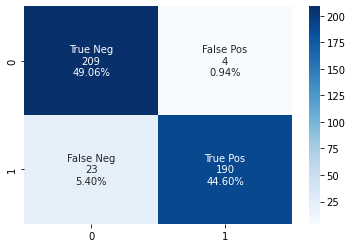

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cms.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cms.flatten()/np.sum(cms)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.95348837 0.88372093 0.93023256 0.95348837 0.97674419 0.8372093
 0.97619048 0.95238095 0.92857143 0.97619048]

Cross Val Accuracy : 0.9368217054263566


In [ ]:
cvresult(Y,Y_cvpreds)

Cross Val f1 score :  0.9336609336609336
Cross Val Precision :  0.979381443298969
Cross Val recall :  0.892018779342723
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       213
           1       0.98      0.89      0.93       213

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426



In [ ]:
result(Y_test,Y_preds)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        61

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [ ]:
svm_auc = roc_auc_score(Y_test,svm_prob[:,1])
print('roc-auc score :{}'.format(svm_auc))

roc-auc score :1.0


##kernel SVM

In [ ]:
ksclassifier = SVC(kernel = 'rbf',C=50,random_state = 0, probability=True)
ksclassifier.fit(X_train,Y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_predks = ksclassifier.predict(X_test)

In [ ]:
 ytest_pred = ksclassifier.predict_proba(X_test)
 ksvm_prob = ksclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredks = cross_val_predict(ksclassifier, X, Y, cv=10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predks)
print(cms)

[[45  1]
 [12 49]]


In [ ]:
cmks = confusion_matrix(Y,Y_cvpredks)
print(cmks)

[[206   7]
 [ 49 164]]


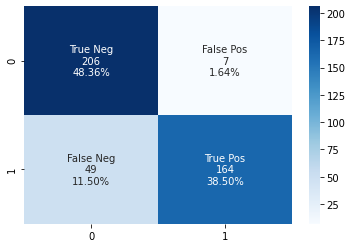

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmks.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmks.flatten()/np.sum(cmks)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmks, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.90697674 0.8372093  0.93023256 0.90697674 0.86046512 0.69767442
 0.9047619  0.92857143 0.78571429 0.92857143]

Cross Val Accuracy : 0.8687153931339978


In [ ]:
cvresult(Y,Y_cvpredks)

Cross Val f1 score :  0.8541666666666666
Cross Val Precision :  0.9590643274853801
Cross Val recall :  0.7699530516431925
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       213
           1       0.96      0.77      0.85       213

    accuracy                           0.87       426
   macro avg       0.88      0.87      0.87       426
weighted avg       0.88      0.87      0.87       426



In [ ]:
result(Y_test,Y_predks)

Accuracy :  0.8785046728971962
f1 score :  0.882882882882883
Precision :  0.98
recall :  0.8032786885245902
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87        46
           1       0.98      0.80      0.88        61

    accuracy                           0.88       107
   macro avg       0.88      0.89      0.88       107
weighted avg       0.90      0.88      0.88       107



In [ ]:
ksvm_auc = roc_auc_score(Y_test,ksvm_prob[:,1])
print('roc-auc score :{}'.format(ksvm_auc))

roc-auc score :0.9522451888809693


## Naive Bays

In [ ]:
nbclassifier = GaussianNB(var_smoothing=best_paramnb['var_smoothing'])
nbclassifier.fit(X,Y)

GaussianNB(var_smoothing=0.01)

In [ ]:
Y_prednb = nbclassifier.predict(X_test)

In [ ]:
ytest_pred = nbclassifier.predict_proba(X_test)
nb_prob = nbclassifier.predict_proba(X_test)

In [ ]:
Y_cvprednb = cross_val_predict(nbclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_prednb)
print(cms)

[[46  0]
 [18 43]]


In [ ]:
cvcms = confusion_matrix(Y, Y_cvprednb)
print(cvcms)

[[204   9]
 [ 67 146]]


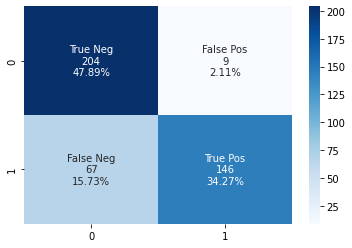

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcms.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcms.flatten()/np.sum(cvcms)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.79069767 0.79069767 0.79069767 0.90697674 0.86046512 0.69767442
 0.9047619  0.83333333 0.78571429 0.85714286]

Cross Val Accuracy : 0.8218161683277962


In [ ]:
cvresult(Y,Y_cvprednb)

Cross Val f1 score :  0.7934782608695652
Cross Val Precision :  0.9419354838709677
Cross Val recall :  0.6854460093896714
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       213
           1       0.94      0.69      0.79       213

    accuracy                           0.82       426
   macro avg       0.85      0.82      0.82       426
weighted avg       0.85      0.82      0.82       426



In [ ]:
result(Y_test,Y_prednb)

Accuracy :  0.8317757009345794
f1 score :  0.8269230769230769
Precision :  1.0
recall :  0.7049180327868853
Classification Report : 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        46
           1       1.00      0.70      0.83        61

    accuracy                           0.83       107
   macro avg       0.86      0.85      0.83       107
weighted avg       0.88      0.83      0.83       107



In [ ]:
nb_auc = roc_auc_score(Y_test,nb_prob[:,1])
print('roc-auc score :{}'.format(nb_auc))

roc-auc score :0.9604419101924447


## Decision Tree

In [ ]:
dtclassifier = DecisionTreeClassifier(splitter=best_paramdt['splitter'],max_depth=best_paramdt['max_depth'],
                                      min_samples_leaf=best_paramdt['min_samples_leaf'],max_features=best_paramdt['max_features'],
                                      max_leaf_nodes=best_paramdt['max_leaf_nodes'], random_state = 42)
dtclassifier.fit(X,Y)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=50, random_state=42)

In [ ]:
Y_preddt = dtclassifier.predict(X_test)

In [ ]:
Y_cvpreddt = cross_val_predict(dtclassifier,X,Y,cv = 10)

In [ ]:
ytest_pred = dtclassifier.predict_proba(X_test)
dt_prob = dtclassifier.predict_proba(X_test)

In [ ]:
cms = confusion_matrix(Y_test,Y_preddt)
print(cms)

[[44  2]
 [10 51]]


In [ ]:
cvcmsdt = confusion_matrix(Y, Y_cvpreddt)
print(cvcmsdt)

[[194  19]
 [ 76 137]]


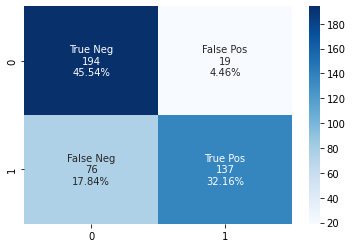

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsdt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsdt.flatten()/np.sum(cvcmsdt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsdt, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.74418605 0.76744186 0.76744186 0.88372093 0.88372093 0.62790698
 0.83333333 0.78571429 0.76190476 0.71428571]

Cross Val Accuracy : 0.7769656699889259


In [ ]:
cvresult(Y,Y_cvpreddt)

Cross Val f1 score :  0.7425474254742548
Cross Val Precision :  0.8782051282051282
Cross Val recall :  0.6431924882629108
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       213
           1       0.88      0.64      0.74       213

    accuracy                           0.78       426
   macro avg       0.80      0.78      0.77       426
weighted avg       0.80      0.78      0.77       426



In [ ]:
result(Y_test,Y_preddt)

Accuracy :  0.8878504672897196
f1 score :  0.8947368421052632
Precision :  0.9622641509433962
recall :  0.8360655737704918
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        46
           1       0.96      0.84      0.89        61

    accuracy                           0.89       107
   macro avg       0.89      0.90      0.89       107
weighted avg       0.90      0.89      0.89       107



In [ ]:
dt_auc = roc_auc_score(Y_test,dt_prob[:,1])
print('roc-auc score :{}'.format(dt_auc))

roc-auc score :0.9130434782608696


## Random forest

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators = best_paramrf['n_estimators'],bootstrap=best_paramrf['bootstrap'],
                                      max_depth=best_paramrf['max_depth'],
                                      max_features=best_paramrf['max_features'], random_state = 42)
rfclassifier.fit(X,Y)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=10,
                       random_state=42)

In [ ]:
Y_predrf = rfclassifier.predict(X_test)

In [ ]:
ytest_pred = rfclassifier.predict_proba(X_test)
rf_prob = rfclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredrf = cross_val_predict(rfclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predrf)
print(cms)

[[46  0]
 [ 1 60]]


In [ ]:
cvcmsrf = confusion_matrix(Y, Y_cvpredrf)
print(cvcmsrf)

[[201  12]
 [ 30 183]]


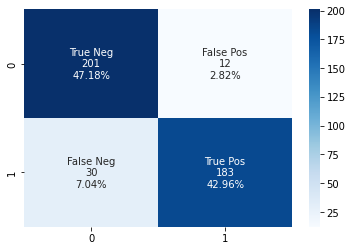

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsrf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsrf.flatten()/np.sum(cvcmsrf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsrf, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.8372093  0.88372093 0.90697674 0.97674419 0.95348837 0.81395349
 0.92857143 0.9047619  0.9047619  0.9047619 ]

Cross Val Accuracy : 0.9014950166112957


In [ ]:
cvresult(Y,Y_cvpredrf)

Cross Val f1 score :  0.8970588235294118
Cross Val Precision :  0.9384615384615385
Cross Val recall :  0.8591549295774648
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       213
           1       0.94      0.86      0.90       213

    accuracy                           0.90       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.90      0.90      0.90       426



In [ ]:
result(Y_test,Y_predrf)

Accuracy :  0.9906542056074766
f1 score :  0.9917355371900827
Precision :  1.0
recall :  0.9836065573770492
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        61

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



In [ ]:
rf_auc = roc_auc_score(Y_test,rf_prob[:,1])
print('roc-auc score :{}'.format(rf_auc))

roc-auc score :0.9999999999999999


## Extra Tree

In [ ]:
etclassifier = ExtraTreeClassifier(criterion=best_paramet['criterion'],max_depth=best_paramet['max_depth'],
                                   max_features=best_paramet['max_features'],random_state=42)
etclassifier.fit(X,Y)

ExtraTreeClassifier(criterion='entropy', max_depth=27, max_features='sqrt',
                    random_state=42)

In [ ]:
Y_predet = etclassifier.predict(X_test)

In [ ]:
ytest_pred = etclassifier.predict_proba(X_test)
et_prob = etclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredet = cross_val_predict(etclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predet)
print(cms)

[[46  0]
 [ 0 61]]


In [ ]:
cvcmset = confusion_matrix(Y, Y_cvpredet)
print(cvcmset)

[[193  20]
 [ 42 171]]


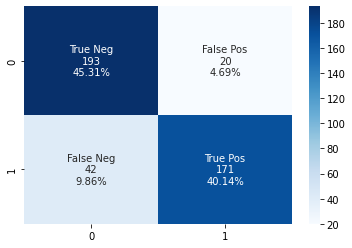

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmset.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmset.flatten()/np.sum(cvcmset)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmset, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86046512 0.76744186 0.88372093 0.90697674 0.8372093  0.76744186
 0.95238095 0.92857143 0.83333333 0.80952381]

Cross Val Accuracy : 0.8547065337763012


In [ ]:
cvresult(Y,Y_cvpredet)

Cross Val f1 score :  0.8465346534653466
Cross Val Precision :  0.8952879581151832
Cross Val recall :  0.8028169014084507
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       213
           1       0.90      0.80      0.85       213

    accuracy                           0.85       426
   macro avg       0.86      0.85      0.85       426
weighted avg       0.86      0.85      0.85       426



In [ ]:
result(Y_test,Y_predet)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        61

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [ ]:
et_auc = roc_auc_score(Y_test,et_prob[:,1])
print('roc-auc score :{}'.format(et_auc))

roc-auc score :1.0


## ROC-AUC Curve

In [ ]:
pred = []
for model in [classifier, kclassifier, sclassifier, ksclassifier, nbclassifier, dtclassifier,rfclassifier] :
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Final roc-auc score :{}'.format(roc_auc_score(Y_test,final_prediction)))

Final roc-auc score :0.9828937990021382


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3,4,5,6
0,0.245926,0.1,0.249338,0.167499,0.174323,0.151163,0.105343
1,0.999945,1.0,1.000000,0.909690,1.000000,1.000000,1.000000
2,0.918071,0.9,0.907479,0.987338,0.914142,1.000000,1.000000
3,0.143620,0.1,0.149516,0.169843,0.135145,0.151163,0.097334
4,0.929563,1.0,0.919804,0.990838,0.933460,1.000000,1.000000
...,...,...,...,...,...,...,...
102,0.008022,0.0,0.009664,0.151864,0.185722,0.065217,0.004552
103,0.016543,0.0,0.019445,0.172264,0.137962,0.065217,0.004552
104,0.999995,1.0,1.000000,0.918546,1.000000,1.000000,1.000000
105,0.093080,0.2,0.099019,0.182493,0.120282,0.065217,0.097835


In [ ]:
final_prediction

0      0.170513
1      0.987091
2      0.946719
3      0.135232
4      0.967666
         ...   
102    0.060720
103    0.059426
104    0.988363
105    0.122561
106    0.987446
Length: 107, dtype: float64

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds

array([1.99754513, 0.99754513, 0.69648831, 0.67380013, 0.31491704,
       0.3104668 , 0.27762842, 0.18666921, 0.17874915, 0.1579664 ,
       0.15637503, 0.13784043, 0.13653739, 0.05907875])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
  y_pred = np.where(final_prediction>thres,1,0)
  accuracy_ls.append(accuracy_score(Y_test,y_pred, normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['Thresholds','Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending = False, inplace=True)
accuracy_ls.head()

,Thresholds,Accuracy
6,0.277628,0.943925
5,0.310467,0.934579
4,0.314917,0.925234
3,0.673800,0.915888
2,0.696488,0.906542


In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color = 'red', label='ROC')
  plt.plot([0,1], [0,1], color= 'blue', linestyle='--' )
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend()
  plt.show()

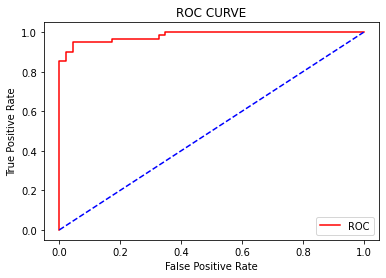

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])

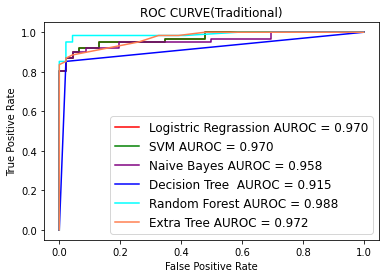

In [ ]:
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'purple', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE(Traditional)')
plt.legend(loc=4, prop={'size': 12})
plt.show()

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('SVM', sclassifier), ('RF', rfclassifier),('ET', etclassifier)]
stackclassifier = StackingClassifier(estimators=estimators)


cross validation
cross accuracy: 0.9508305647840531
cross precision: 0.9734761904761905
cross recall: 0.9296536796536797
cross f1 score: 0.9495111738446294


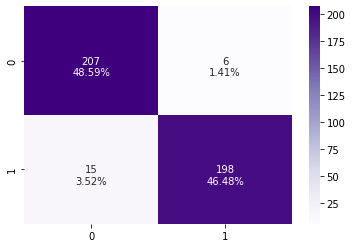

In [ ]:
Kfold_result(X,Y,stackclassifier,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
stackclassifier.fit(X,Y)
st_probs_y = stackclassifier.predict_proba(X)
st_auc_y = roc_auc_score(Y, st_probs_y[:,1])
st_fpr, st_tpr, threshold = roc_curve(Y,st_probs_y[:,1])
print(st_auc_y)

1.0


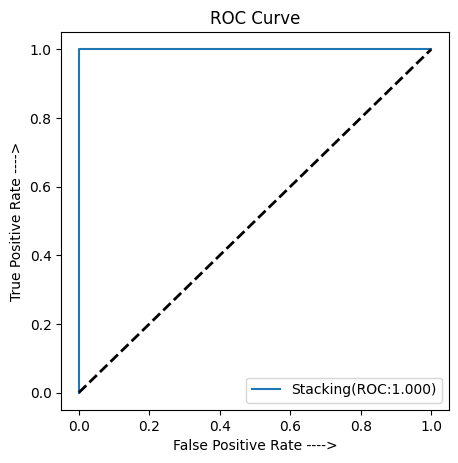

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(5,5),dpi = 100)
plt.plot(st_fpr,st_tpr,linestyle='-',label='Stacking(ROC:%0.3f)' % st_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

#Hard Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfh = VotingClassifier(estimators=[('ETmodel', classifier), ('SVM', sclassifier), ('RF', dtclassifier)],voting='hard')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble_hard']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.8477 (+/- 0.070) [LR Classifier]
Accuracy: 0.9368 (+/- 0.043) [SVM]
Accuracy: 0.9015 (+/- 0.046) [RF]
Accuracy: 0.8992 (+/- 0.056) [Ensemble_hard]
Precision: 0.8761 (+/- 0.073) [LR Classifier]
Precision: 0.9816 (+/- 0.029) [SVM]
Precision: 0.9486 (+/- 0.068) [RF]
Precision: 0.9698 (+/- 0.032) [Ensemble]
Recall: 0.8167 (+/- 0.123) [LR Classifier]
Recall: 0.8918 (+/- 0.090) [SVM]
Recall: 0.8587 (+/- 0.093) [RF]
Recall: 0.8260 (+/- 0.120) [Ensemble]


# Soft ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfs = VotingClassifier(estimators=[('LR',classifier), ('SVM', sclassifier), ('RF', rfclassifier)],voting='soft')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfs], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfs], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfs], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.8477 (+/- 0.070) [LR]
Accuracy: 0.9368 (+/- 0.043) [SVM]
Accuracy: 0.9015 (+/- 0.046) [RF]
Accuracy: 0.9274 (+/- 0.045) [Ensemble_soft]
Precision: 0.8761 (+/- 0.073) [LR]
Precision: 0.9816 (+/- 0.029) [SVM]
Precision: 0.9486 (+/- 0.068) [RF]
Precision: 0.9765 (+/- 0.038) [Ensemble_soft]
Recall: 0.8167 (+/- 0.123) [LR]
Recall: 0.8918 (+/- 0.090) [SVM]
Recall: 0.8587 (+/- 0.093) [RF]
Recall: 0.8777 (+/- 0.085) [Ensemble_soft]


In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass


cross validation
cross accuracy: 0.9273532668881506
cross precision: 0.9765424430641823
cross recall: 0.8777056277056277
cross f1 score: 0.9216665102916111


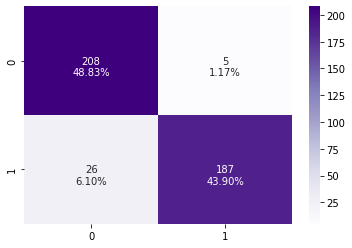

In [ ]:
Kfold_result(X,Y,eclfs,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
eclfs.fit(X,Y)
es_probs_y = eclfs.predict_proba(X)
es_auc_y = roc_auc_score(Y, es_probs_y[:,1])
es_fpr, es_tpr, threshold = roc_curve(Y,es_probs_y[:,1])
print(es_auc_y)

1.0


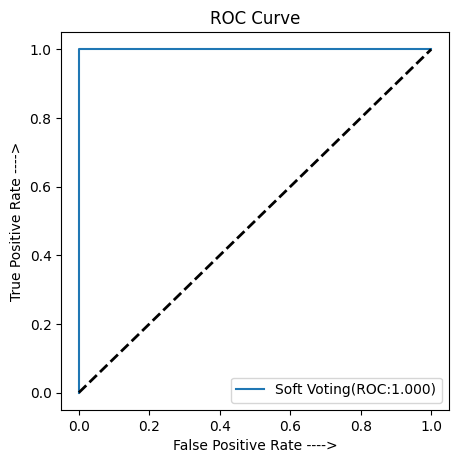

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve


plt.figure(figsize=(5,5),dpi = 100)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Soft Voting(ROC:%0.3f)' % es_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

# ROC

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])


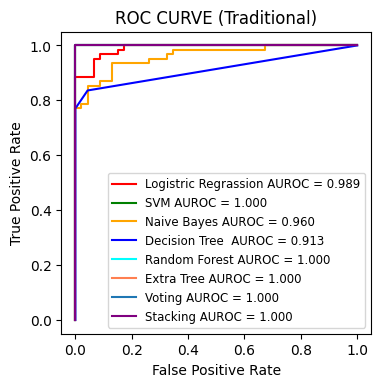

In [ ]:
plt.figure(figsize=(4,4),dpi = 100)
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Voting AUROC = %0.3f' % es_auc_y)
plt.plot(st_fpr,st_tpr,color = 'purple', linestyle='-',label='Stacking AUROC = %0.3f' % st_auc_y)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 8.5})
plt.show()

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

## Hyper parameter Tuning

### Bagging Logistic Regression Random Search

In [ ]:
grs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [LogisticRegression(solver='liblinear',multi_class='auto')],
    'bootstrap' : ['True','False',None],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,50,1)],
    'n_jobs' : [1,2,3,4,5]
})
grs.fit(X,Y)
best_paramgrs = grs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap','param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]
print(best_paramgrs)

{'n_jobs': 3, 'n_estimators': 6, 'bootstrap_features': 'True', 'bootstrap': 'False', 'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)}


### Bagging KNN Random Search

In [ ]:
kgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [KNeighborsClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
grs.fit(X_train,Y_train)
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,41,4,0.896528
1,False,23,1,0.896528
2,False,40,5,0.896528
3,None,18,4,0.896528
4,False,17,1,0.896528
5,None,43,1,0.896528
6,None,24,5,0.896528
7,True,40,4,0.896528
8,True,21,2,0.896528
9,None,44,1,0.896528


### Bagging SVM Random Search

In [ ]:
sgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [SVC()],
    'bootstrap' : ['True','False',None],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
sgrs.fit(X,Y)
best_paramsgrs = sgrs.best_params_
pd.DataFrame(sgrs.cv_results_)[['param_bootstrap','param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]
print(best_paramsgrs)

{'n_jobs': 5, 'n_estimators': 68, 'bootstrap_features': 'False', 'bootstrap': 'False', 'base_estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)}


### Bagging NB Random Search

In [ ]:
nbgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [GaussianNB()],
    'bootstrap' : ['True','False',None],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
nbgrs.fit(X,Y)
best_paramnbgrs = nbgrs.best_params_
print(best_paramnbgrs)

{'n_jobs': 5, 'n_estimators': 17, 'bootstrap_features': 'True', 'bootstrap': 'False', 'base_estimator': GaussianNB(priors=None, var_smoothing=1e-09)}


### Bagging DT Random Search

In [ ]:
dtgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [DecisionTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
dtgrs.fit(X,Y)
best_paramdtgrs = dtgrs.best_params_
print(best_paramdtgrs)

{'n_jobs': 4, 'n_estimators': 87, 'bootstrap_features': 'False', 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')}


### Bagging RF Random Search

In [ ]:
rfgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [RandomForestClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
rfgrs.fit(X,Y)
best_paramrfgrs = rfgrs.best_params_
print(best_paramrfgrs)

{'n_jobs': 5, 'n_estimators': 45, 'bootstrap_features': 'True', 'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)}


### Bagging Extra Tree Random Search

In [ ]:
etgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [ExtraTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
etgrs.fit(X,Y)
best_parametgrs = etgrs.best_params_
print(best_parametgrs)

{'n_jobs': 5, 'n_estimators': 86, 'bootstrap_features': 'False', 'base_estimator': ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')}


## Base estimator Logistric Regression

In [ ]:
bag = BaggingClassifier(classifier,n_estimators= best_paramgrs['n_estimators'],bootstrap_features=best_paramgrs['bootstrap_features'],
                        n_jobs=best_paramgrs['n_jobs'],random_state=42)

In [ ]:
bag.fit(X,Y)

BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=42,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features='True', max_features=1.0,
                  max_samples=1.0, n_estimators=6, n_jobs=3, oob_score=False,
                  random_state=42, verbose

In [ ]:
Y_predbglr = bag.predict(X_test)

In [ ]:
Y_cvpredbglr = cross_val_predict(bag,X,Y,cv = 10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predbglr)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbglr)
print(cmbg)

[[202  11]
 [ 38 175]]


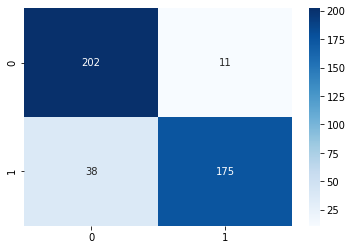

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(bag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.88372093 0.86046512 0.93023256 0.90697674 0.90697674 0.72093023
 0.92857143 0.95238095 0.85714286 0.9047619 ]

Cross Val Accuracy : 0.8852159468438539


In [ ]:
cvresult(Y,Y_cvpredbglr)

Cross Val f1 score :  0.8771929824561404
Cross Val Precision :  0.9408602150537635
Cross Val recall :  0.8215962441314554
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       213
           1       0.94      0.82      0.88       213

    accuracy                           0.88       426
   macro avg       0.89      0.88      0.88       426
weighted avg       0.89      0.88      0.88       426



In [ ]:
result(Y_test,Y_predbglr)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
lrbg_prob = bag.predict_proba(X_test)

In [ ]:
lrbg_auc = roc_auc_score(Y_test,lrbg_prob[:,1])
print('roc-auc score :{}'.format(lrbg_auc))

roc-auc score :0.9704205274411974


## Base estimator K-NN

In [ ]:
kbag = BaggingClassifier(kclassifier,n_jobs=2,bootstrap=True,bootstrap_features=None,n_estimators=100)

In [ ]:
kbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=1,
                                                      metric='euclidean',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=10, p=1,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=None, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=2, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgk = kbag.predict(X_test)

In [ ]:
Y_cvpredbgk = cross_val_predict(kbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgk)
print(cm)

[[46  0]
 [ 8 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgk)
print(cmbg)

[[196  17]
 [ 27 186]]


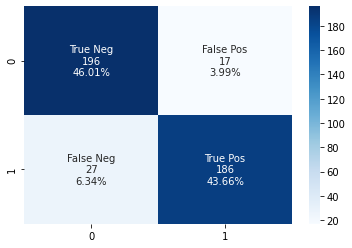

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.8372093  0.86046512 0.88372093 0.97674419 0.93023256 0.76744186
 0.9047619  0.95238095 0.88095238 0.88095238]

Cross Val Accuracy : 0.8874861572535991


In [ ]:
cvresult(Y,Y_cvpredbgk)

Cross Val f1 score :  0.8942307692307692
Cross Val Precision :  0.916256157635468
Cross Val recall :  0.8732394366197183
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       213
           1       0.92      0.87      0.89       213

    accuracy                           0.90       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.90      0.90      0.90       426



In [ ]:
result(Y_test,Y_predbgk)

Accuracy :  0.9252336448598131
f1 score :  0.9298245614035088
Precision :  1.0
recall :  0.8688524590163934
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        46
           1       1.00      0.87      0.93        61

    accuracy                           0.93       107
   macro avg       0.93      0.93      0.92       107
weighted avg       0.94      0.93      0.93       107



In [ ]:
knnbg_prob = kbag.predict_proba(X_test)
knnbg_auc = roc_auc_score(Y_test,knnbg_prob[:,1])
print('roc-auc score :{}'.format(knnbg_auc))

roc-auc score :0.9868139700641482


## Base estimator SVM

In [ ]:
sbag = BaggingClassifier(sclassifier, n_estimators= best_paramsgrs['n_estimators'],bootstrap_features=best_paramsgrs['bootstrap_features'],
                          n_jobs= best_paramsgrs['n_jobs'],random_state=42)

In [ ]:
sbag.fit(X,Y)

BaggingClassifier(base_estimator=SVC(C=5, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='linear',
                                     max_iter=-1, probability=True,
                                     random_state=42, shrinking=True, tol=0.001,
                                     verbose=False),
                  bootstrap=True, bootstrap_features='False', max_features=1.0,
                  max_samples=1.0, n_estimators=68, n_jobs=5, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_predbgs = sbag.predict(X_test)

In [ ]:
Y_cvpredbgs = cross_val_predict(sbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgs)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgs)
print(cmbg)

[[204   9]
 [ 39 174]]


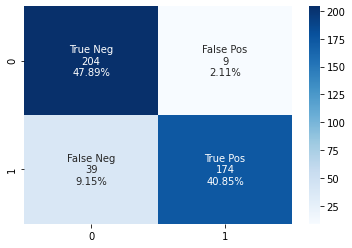

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.88372093 0.88372093 0.93023256 0.90697674 0.90697674 0.72093023
 0.92857143 0.95238095 0.85714286 0.9047619 ]

Cross Val Accuracy : 0.8875415282392026


In [ ]:
cvresult(Y,Y_cvpredbgs)

Cross Val f1 score :  0.8787878787878788
Cross Val Precision :  0.9508196721311475
Cross Val recall :  0.8169014084507042
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       213
           1       0.95      0.82      0.88       213

    accuracy                           0.89       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.90      0.89      0.89       426



In [ ]:
result(Y_test,Y_predbgs)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
svmbg_prob = sbag.predict_proba(X_test)
svmbg_auc = roc_auc_score(Y_test,svmbg_prob[:,1])
print('roc-auc score :{}'.format(svmbg_auc))

roc-auc score :0.9704205274411974


## Base estimator kernal SVM

In [ ]:
ksbag = BaggingClassifier(ksclassifier, n_jobs=5,bootstrap=True,bootstrap_features=None,n_estimators=5)

In [ ]:
ksbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=50, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=True, random_state=0,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=None, max_features=1.0,
                  max_samples=1.0, n_estimators=5, n_jobs=5, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgks = ksbag.predict(X_test)

In [ ]:
Y_cvpredbgks = cross_val_predict(ksbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgks)
print(cm)

[[46  0]
 [ 8 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgks)
print(cmbg)

[[199  14]
 [ 28 185]]


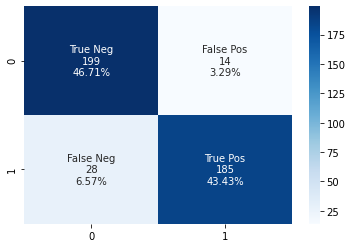

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.88372093 0.88372093 0.90697674 0.97674419 0.93023256 0.76744186
 0.95238095 0.95238095 0.88095238 0.88095238]

Cross Val Accuracy : 0.9015503875968992


In [ ]:
cvresult(Y,Y_cvpredbgks)

Cross Val f1 score :  0.8980582524271845
Cross Val Precision :  0.9296482412060302
Cross Val recall :  0.8685446009389671
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       213
           1       0.93      0.87      0.90       213

    accuracy                           0.90       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.90      0.90      0.90       426



In [ ]:
result(Y_test,Y_predks)

Accuracy :  0.9252336448598131
f1 score :  0.9298245614035088
Precision :  1.0
recall :  0.8688524590163934
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        46
           1       1.00      0.87      0.93        61

    accuracy                           0.93       107
   macro avg       0.93      0.93      0.92       107
weighted avg       0.94      0.93      0.93       107



In [ ]:
ksvmbg_prob = ksbag.predict_proba(X_test)
ksvmbg_auc = roc_auc_score(Y_test,ksvmbg_prob[:,1])
print('roc-auc score :{}'.format(ksvmbg_auc))

roc-auc score :0.9800427655024946


## Base estimator Naive Bayes

In [ ]:
nbbag = BaggingClassifier(nbclassifier, n_estimators= best_paramnbgrs['n_estimators'],
                          bootstrap_features=best_paramnbgrs['bootstrap_features'],
                          n_jobs=best_paramnbgrs['n_jobs'],random_state=42)

In [ ]:
nbbag.fit(X,Y)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=0.015),
                  bootstrap=True, bootstrap_features='True', max_features=1.0,
                  max_samples=1.0, n_estimators=17, n_jobs=5, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_predbgnb = nbbag.predict(X_test)

In [ ]:
Y_cvpredbgnb = cross_val_predict(nbbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgnb)
print(cm)

[[45  1]
 [12 49]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgnb)
print(cmbg)

[[207   6]
 [ 53 160]]


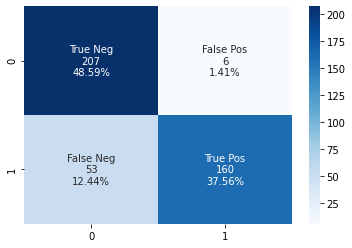

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.90697674 0.8372093  0.93023256 0.90697674 0.86046512 0.6744186
 0.9047619  0.9047619  0.78571429 0.9047619 ]

Cross Val Accuracy : 0.8616279069767442


In [ ]:
cvresult(Y,Y_cvpredbgnb)

Cross Val f1 score :  0.8443271767810026
Cross Val Precision :  0.963855421686747
Cross Val recall :  0.7511737089201878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       213
           1       0.96      0.75      0.84       213

    accuracy                           0.86       426
   macro avg       0.88      0.86      0.86       426
weighted avg       0.88      0.86      0.86       426



In [ ]:
result(Y_test,Y_predbgnb)

Accuracy :  0.8785046728971962
f1 score :  0.882882882882883
Precision :  0.98
recall :  0.8032786885245902
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87        46
           1       0.98      0.80      0.88        61

    accuracy                           0.88       107
   macro avg       0.88      0.89      0.88       107
weighted avg       0.90      0.88      0.88       107



In [ ]:
nbbg_prob = nbbag.predict_proba(X_test)
nbbg_auc = roc_auc_score(Y_test,nbbg_prob[:,1])
print('roc-auc score :{}'.format(nbbg_auc))

roc-auc score :0.9593727726300784


## Base estimator Decision Tree

In [ ]:
dtbag = BaggingClassifier(dtclassifier, n_estimators= best_paramdtgrs['n_estimators'],bootstrap_features=best_paramdtgrs['bootstrap_features'],
                          n_jobs=best_paramdtgrs['n_jobs'],random_state =42)

In [ ]:
dtbag.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features='log2',
                                                        max_leaf_nodes=90,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
     

In [ ]:
Y_predbgdt = dtbag.predict(X_test)

In [ ]:
Y_cvpredbgdt = cross_val_predict(dtbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgdt)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgdt)
print(cmbg)

[[204   9]
 [ 39 174]]


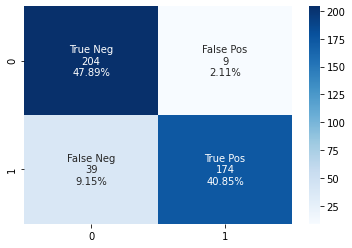

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.90697674 0.86046512 0.93023256 0.90697674 0.90697674 0.72093023
 0.92857143 0.95238095 0.85714286 0.9047619 ]

Cross Val Accuracy : 0.8875415282392026


In [ ]:
cvresult(Y,Y_cvpredbgdt)

Cross Val f1 score :  0.8787878787878788
Cross Val Precision :  0.9508196721311475
Cross Val recall :  0.8169014084507042
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       213
           1       0.95      0.82      0.88       213

    accuracy                           0.89       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.90      0.89      0.89       426



In [ ]:
result(Y_test,Y_predbgdt)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
dtbg_prob = dtbag.predict_proba(X_test)
dtbg_auc = roc_auc_score(Y_test,dtbg_prob[:,1])
print('roc-auc score :{}'.format(dtbg_auc))

roc-auc score :0.9376336421952958


## Base estimator Random Forest

In [ ]:
rfbag = BaggingClassifier(rfclassifier, n_estimators= best_paramrfgrs['n_estimators'],bootstrap_features=best_paramrfgrs['bootstrap_features'],
                          n_jobs=best_paramrfgrs['n_jobs'],random_state=42)

In [ ]:
rfbag.fit(X,Y)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
        

In [ ]:
Y_predbgrf = rfbag.predict(X_test)

In [ ]:
Y_cvpredbgrf = cross_val_predict(rfbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgrf)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgrf)
print(cmbg)

[[204   9]
 [ 40 173]]


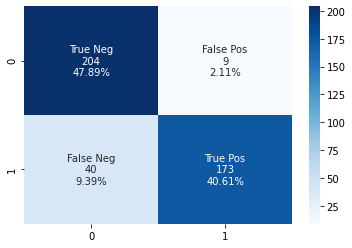

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.90697674 0.86046512 0.93023256 0.90697674 0.90697674 0.69767442
 0.92857143 0.95238095 0.85714286 0.9047619 ]

Cross Val Accuracy : 0.8852159468438539


In [ ]:
cvresult(Y,Y_cvpredbgrf)

Cross Val f1 score :  0.8759493670886076
Cross Val Precision :  0.9505494505494505
Cross Val recall :  0.812206572769953
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       213
           1       0.95      0.81      0.88       213

    accuracy                           0.88       426
   macro avg       0.89      0.88      0.88       426
weighted avg       0.89      0.88      0.88       426



In [ ]:
result(Y_test,Y_predbgrf)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
rfbg_prob = rfbag.predict_proba(X_test)
rfbg_auc = roc_auc_score(Y_test,rfbg_prob[:,1])
print('roc-auc score :{}'.format(rfbg_auc))

roc-auc score :0.9946543121881681


## Base estimator Extra Tree

In [ ]:
etbag = BaggingClassifier(etclassifier, n_estimators= best_parametgrs['n_estimators'],
                          bootstrap_features=best_parametgrs['bootstrap_features'],n_jobs=best_parametgrs['n_jobs'],random_state=42)

In [ ]:
etbag.fit(X,Y)

BaggingClassifier(base_estimator=ExtraTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=42,
                                                     splitter='random'),
                  bootstrap=True, bootstr

In [ ]:
Y_predbget = etbag.predict(X_test)

In [ ]:
Y_cvpredbget = cross_val_predict(etbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbget)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbget)
print(cmbg)

[[204   9]
 [ 39 174]]


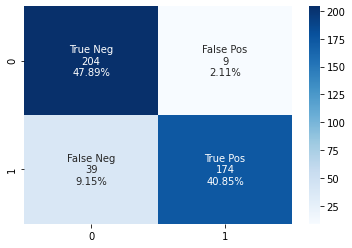

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.90697674 0.86046512 0.93023256 0.90697674 0.90697674 0.72093023
 0.92857143 0.95238095 0.85714286 0.9047619 ]

Cross Val Accuracy : 0.8875415282392026


In [ ]:
cvresult(Y,Y_cvpredbget)

Cross Val f1 score :  0.8787878787878788
Cross Val Precision :  0.9508196721311475
Cross Val recall :  0.8169014084507042
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       213
           1       0.95      0.82      0.88       213

    accuracy                           0.89       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.90      0.89      0.89       426



In [ ]:
result(Y_test,Y_predbget)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
etbg_prob = etbag.predict_proba(X_test)
etbg_auc = roc_auc_score(Y_test,etbg_prob[:,1])
print('roc-auc score :{}'.format(etbg_auc))

roc-auc score :0.9964362081254455


## ROC AUC CURVE  (Bagging)

In [ ]:
lrg_fpr,lrg_tpr,_ = roc_curve(Y_test,lrbg_prob[:,1])
svmg_fpr,svmg_tpr,_ = roc_curve(Y_test,svmbg_prob[:,1])
nbg_fpr,nbg_tpr,_ = roc_curve(Y_test,nbbg_prob[:,1])
dtg_fpr,dtg_tpr,_ = roc_curve(Y_test,dtbg_prob[:,1])
rfg_fpr,rfg_tpr,_ = roc_curve(Y_test,rfbg_prob[:,1])
etg_fpr,etg_tpr,_ = roc_curve(Y_test,etbg_prob[:,1])

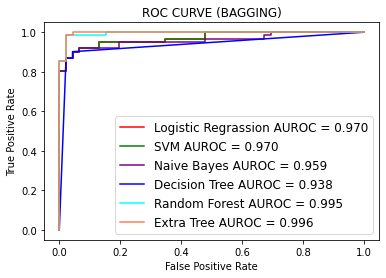

In [ ]:
plt.plot(lrg_fpr, lrg_tpr, color = 'red', linestyle='-',label='Logistic Regrassion AUROC = %0.3f'% lrbg_auc)
plt.plot(svmg_fpr, svmg_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svmbg_auc)
plt.plot(nbg_fpr, nbg_tpr, color = 'purple', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nbbg_auc)
plt.plot(dtg_fpr, dtg_tpr, color = 'blue', linestyle='-',label='Decision Tree AUROC = %0.3f'% dtbg_auc)
plt.plot(rfg_fpr, rfg_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rfbg_auc)
plt.plot(etg_fpr, etg_tpr, color = 'Coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% etbg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (BAGGING)')
plt.legend(loc=4, prop={'size': 12})
plt.show()

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.utils.testing import all_estimators

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## Boosting Random Search

## Base estimator Logistric Regression

In [ ]:
bs = AdaBoostClassifier(classifier,learning_rate=1, n_estimators=10, random_state=None)

In [ ]:
bs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=10, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=42,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1, n_estimators=10, random_state=None)

In [ ]:
Y_predbslr = bs.predict(X_test)

In [ ]:
Y_cvpredbslr = cross_val_predict(bs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbslr)
print(cm)

[[44  2]
 [ 8 53]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbslr)
print(cmbs)

[[194  19]
 [ 35 178]]


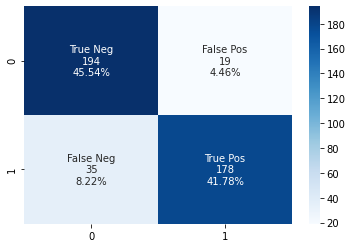

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(bs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86046512 0.8372093  0.90697674 0.90697674 0.88372093 0.72093023
 0.92857143 0.9047619  0.88095238 0.9047619 ]

Cross Val Accuracy : 0.873532668881506


In [ ]:
cvresult(Y,Y_cvpredbslr)

Cross Val f1 score :  0.8682926829268293
Cross Val Precision :  0.9035532994923858
Cross Val recall :  0.8356807511737089
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       213
           1       0.90      0.84      0.87       213

    accuracy                           0.87       426
   macro avg       0.88      0.87      0.87       426
weighted avg       0.88      0.87      0.87       426



In [ ]:
result(Y_test,Y_predbslr)

Accuracy :  0.9065420560747663
f1 score :  0.9137931034482758
Precision :  0.9636363636363636
recall :  0.8688524590163934
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        46
           1       0.96      0.87      0.91        61

    accuracy                           0.91       107
   macro avg       0.90      0.91      0.91       107
weighted avg       0.91      0.91      0.91       107



In [ ]:
lrbs_prob = bs.predict_proba(X_test)
lrbs_auc = roc_auc_score(Y_test,lrbs_prob[:,1])
print('roc-auc score :{}'.format(lrbs_auc))

roc-auc score :0.9704205274411974


## Base estimator SVM

In [ ]:
sbs = AdaBoostClassifier(sclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
sbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=5, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=True,
                                      random_state=42, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
Y_predbss = sbs.predict(X_test)

In [ ]:
Y_cvpredbss = cross_val_predict(sbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbss)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbss)
print(cmbs)

[[173  40]
 [ 37 176]]


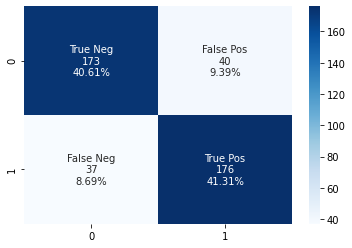

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.62790698 0.86046512 0.93023256 0.81395349 0.90697674 0.48837209
 0.9047619  0.9047619  0.88095238 0.88095238]

Cross Val Accuracy : 0.8199335548172758


In [ ]:
cvresult(Y,Y_cvpredbss)

Cross Val f1 score :  0.8205128205128205
Cross Val Precision :  0.8148148148148148
Cross Val recall :  0.8262910798122066
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       213
           1       0.81      0.83      0.82       213

    accuracy                           0.82       426
   macro avg       0.82      0.82      0.82       426
weighted avg       0.82      0.82      0.82       426



In [ ]:
result(Y_test,Y_predbss)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
svmbs_prob = sbs.predict_proba(X_test)
svmbs_auc = roc_auc_score(Y_test,svmbs_prob[:,1])
print('roc-auc score :{}'.format(svmbs_auc))

roc-auc score :0.9704205274411974


## Base estimator Kernal SVM

In [ ]:
ksbs = AdaBoostClassifier(ksclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
ksbs.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=50, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='rbf', max_iter=-1,
                                      probability=True, random_state=0,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
Y_predbsks = ksbs.predict(X_test)

In [ ]:
Y_cvpredbsks = cross_val_predict(ksbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsks)
print(cm)

[[46  0]
 [11 50]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsks)
print(cmbs)

[[200  13]
 [ 47 166]]


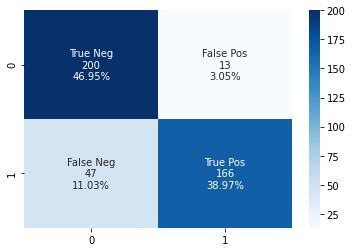

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86046512 0.88372093 0.74418605 0.93023256 0.90697674 0.72093023
 0.95238095 0.78571429 0.92857143 0.88095238]

Cross Val Accuracy : 0.8594130675526024


In [ ]:
cvresult(Y,Y_cvpredbsks)

Cross Val f1 score :  0.8469387755102042
Cross Val Precision :  0.9273743016759777
Cross Val recall :  0.7793427230046949
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       213
           1       0.93      0.78      0.85       213

    accuracy                           0.86       426
   macro avg       0.87      0.86      0.86       426
weighted avg       0.87      0.86      0.86       426



In [ ]:
result(Y_test,Y_predbsks)

Accuracy :  0.897196261682243
f1 score :  0.9009009009009009
Precision :  1.0
recall :  0.819672131147541
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89        46
           1       1.00      0.82      0.90        61

    accuracy                           0.90       107
   macro avg       0.90      0.91      0.90       107
weighted avg       0.92      0.90      0.90       107



In [ ]:
ksvmbs_prob = ksbs.predict_proba(X_test)
ksvmbs_auc = roc_auc_score(Y_test,ksvmbs_prob[:,1])
print('roc-auc score :{}'.format(ksvmbs_auc))

roc-auc score :0.9818246614397719


## Base estimator Naive Bays

In [ ]:
nbbs = AdaBoostClassifier(nbclassifier,learning_rate=1, n_estimators=5, random_state=42)

In [ ]:
nbbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=0.015),
                   learning_rate=1, n_estimators=5, random_state=42)

In [ ]:
Y_predbsnb = nbbs.predict(X_test)

In [ ]:
Y_cvpredbsnb = cross_val_predict(nbbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsnb)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsnb)
print(cmbs)

[[205   8]
 [ 39 174]]


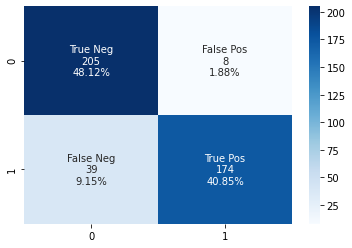

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbbs,X_train,Y_train, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.875      0.8125     0.875      0.90625    0.8125     0.875
 0.90625    0.90625    0.9375     0.87096774]

Cross Val Accuracy : 0.8777217741935484


In [ ]:
cvresult(Y,Y_cvpredbsnb)

Cross Val f1 score :  0.8810126582278481
Cross Val Precision :  0.9560439560439561
Cross Val recall :  0.8169014084507042
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       213
           1       0.96      0.82      0.88       213

    accuracy                           0.89       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.90      0.89      0.89       426



In [ ]:
result(Y_test,Y_predbsnb)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
nbbs_prob = nbbs.predict_proba(X_test)
nbbs_auc = roc_auc_score(Y_test,nbbs_prob[:,1])
print('roc-auc score :{}'.format(nbbs_auc))

roc-auc score :0.9704205274411974


## Base estimator Decision Tree

In [ ]:
dtbs = AdaBoostClassifier(dtclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
dtbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features='log2',
                                                         max_leaf_nodes=90,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
Y_predbsdt = dtbs.predict(X_test)

In [ ]:
Y_cvpredbsdt = cross_val_predict(dtbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsdt)
print(cm)

[[45  1]
 [ 9 52]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsdt)
print(cmbs)

[[204   9]
 [ 41 172]]


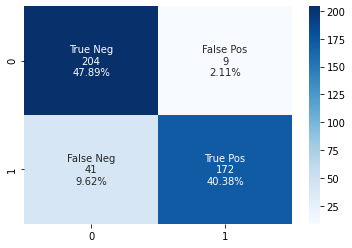

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.90697674 0.86046512 0.93023256 0.90697674 0.90697674 0.72093023
 0.92857143 0.95238095 0.85714286 0.85714286]

Cross Val Accuracy : 0.8827796234772979


In [ ]:
cvresult(Y,Y_cvpredbsdt)

Cross Val f1 score :  0.8730964467005077
Cross Val Precision :  0.9502762430939227
Cross Val recall :  0.8075117370892019
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       213
           1       0.95      0.81      0.87       213

    accuracy                           0.88       426
   macro avg       0.89      0.88      0.88       426
weighted avg       0.89      0.88      0.88       426



In [ ]:
result(Y_test,Y_predbsdt)

Accuracy :  0.9065420560747663
f1 score :  0.912280701754386
Precision :  0.9811320754716981
recall :  0.8524590163934426
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        46
           1       0.98      0.85      0.91        61

    accuracy                           0.91       107
   macro avg       0.91      0.92      0.91       107
weighted avg       0.92      0.91      0.91       107



In [ ]:
dtbs_prob = dtbs.predict_proba(X_test)
dtbs_auc = roc_auc_score(Y_test,dtbs_prob[:,1])
print('roc-auc score :{}'.format(dtbs_auc))

roc-auc score :0.9821810406272273


## Base estimator Random Rofest

In [ ]:
rfbs = AdaBoostClassifier(rfclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
rfbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [ ]:
Y_predbsrf = rfbs.predict(X_test)

In [ ]:
Y_cvpredbsrf = cross_val_predict(rfbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsrf)
print(cm)

[[46  0]
 [ 0 61]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsrf)
print(cmbs)

[[182  31]
 [ 41 172]]


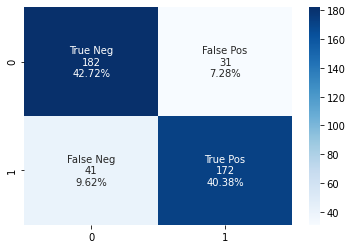

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.8372093  0.81395349 0.90697674 0.81395349 0.86046512 0.6744186
 0.88095238 0.88095238 0.85714286 0.78571429]

Cross Val Accuracy : 0.8311738648947952


In [ ]:
cvresult(Y,Y_cvpredbsrf)

Cross Val f1 score :  0.826923076923077
Cross Val Precision :  0.8472906403940886
Cross Val recall :  0.8075117370892019
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       213
           1       0.85      0.81      0.83       213

    accuracy                           0.83       426
   macro avg       0.83      0.83      0.83       426
weighted avg       0.83      0.83      0.83       426



In [ ]:
result(Y_test,Y_predbsrf)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        61

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [ ]:
rfbs_prob = rfbs.predict_proba(X_test)
rfbs_auc = roc_auc_score(Y_test,rfbs_prob[:,1])
print('roc-auc score :{}'.format(rfbs_auc))

roc-auc score :1.0


## Base estimator Extra Tree

In [ ]:
etbs = AdaBoostClassifier(etclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
etbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreeClassifier(ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='entropy',
                                                      max_depth=9,
                                                      max_features='sqrt',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      random_state=42,
                                                      splitter

In [ ]:
Y_predbset = etbs.predict(X_test)

In [ ]:
Y_cvpredbset = cross_val_predict(etbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbset)
print(cm)

[[46  0]
 [ 5 56]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbset)
print(cmbs)

[[193  20]
 [ 45 168]]


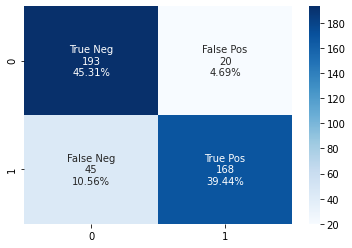

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.88372093 0.81395349 0.90697674 0.81395349 0.93023256 0.65116279
 0.92857143 0.9047619  0.85714286 0.78571429]

Cross Val Accuracy : 0.8476190476190476


In [ ]:
cvresult(Y,Y_cvpredbset)

Cross Val f1 score :  0.8379052369077307
Cross Val Precision :  0.8936170212765957
Cross Val recall :  0.7887323943661971
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       213
           1       0.89      0.79      0.84       213

    accuracy                           0.85       426
   macro avg       0.85      0.85      0.85       426
weighted avg       0.85      0.85      0.85       426



In [ ]:
result(Y_test,Y_predbset)

Accuracy :  0.9532710280373832
f1 score :  0.9572649572649572
Precision :  1.0
recall :  0.9180327868852459
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       1.00      0.92      0.96        61

    accuracy                           0.95       107
   macro avg       0.95      0.96      0.95       107
weighted avg       0.96      0.95      0.95       107



In [ ]:
etbs_prob = etbs.predict_proba(X_test)
etbs_auc = roc_auc_score(Y_test,etbs_prob[:,1])
print('roc-auc score :{}'.format(etbs_auc))

roc-auc score :0.9919814682822522


## ROC AUC CURVE  (Boosting)

In [ ]:
lrs_fpr,lrs_tpr,_ = roc_curve(Y_test,lrbs_prob[:,1])
svms_fpr,svms_tpr,_ = roc_curve(Y_test,svmbs_prob[:,1])
nbs_fpr,nbs_tpr,_ = roc_curve(Y_test,nbbs_prob[:,1])
dts_fpr,dts_tpr,_ = roc_curve(Y_test,dtbs_prob[:,1])
rfs_fpr,rfs_tpr,_ = roc_curve(Y_test,rfbs_prob[:,1])
ets_fpr,ets_tpr,_ = roc_curve(Y_test,etbs_prob[:,1])

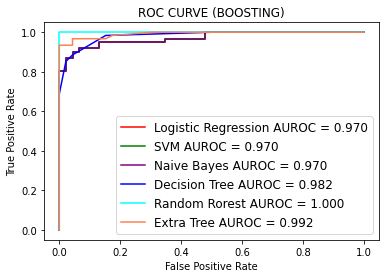

In [ ]:
plt.plot(lrs_fpr, lrs_tpr, color = 'red', linestyle='-',label='Logistic Regression AUROC = %0.3f'% lrbs_auc)
plt.plot(svms_fpr, svms_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svmbs_auc)
plt.plot(nbs_fpr, nbs_tpr, color = 'purple', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nbbs_auc)
plt.plot(dts_fpr, dts_tpr, color = 'blue', linestyle='-',label='Decision Tree AUROC = %0.3f'% dtbs_auc)
plt.plot(rfs_fpr, rfs_tpr, color = 'cyan', linestyle='-',label='Random Rorest AUROC = %0.3f'% rfbs_auc)
plt.plot(ets_fpr, ets_tpr, color = 'Coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% etbs_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (BOOSTING)')
plt.legend(loc=4, prop={'size': 12})
plt.show()